We will use the pre-trained Keras FaceNet model provided by [Hiroki Taniai](https://github.com/nyoki-mtl) in this tutorial. It was trained on [MS-Celeb-1M dataset](https://www.microsoft.com/en-us/research/project/ms-celeb-1m-challenge-recognizing-one-million-celebrities-real-world/) and expects input images to be color, to have their pixel values whitened (standardized across all three channels), and to have a square shape of 160×160 pixels.

The model can be downloaded from here:

[Keras FaceNet Pre-Trained Model (88 megabytes)](https://drive.google.com/open?id=1pwQ3H4aJ8a6yyJHZkTwtjcL4wYWQb7bn)

Download the model file and place it in your current working directory with the filename ‘facenet_keras.h5‘.

In [1]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
model = tf.keras.models.load_model('facenet_keras.h5')
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

Total params: 22,808,144
Trainable params: 22,779,312
Non-trainable params: 28,832
__________________________________________________________________________________________________


In [5]:
import cv2
import numpy as np
image_path = 'images/camera1.jpg'
img1 = cv2.imread(image_path, 1)
img = img1[...,::-1]
print(img.shape)
dim = (160, 160)
# resize image
if(img.shape != (160, 160, 3)):
  img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  print(img.shape)

x_train = np.array([img])
embedding1 = model.predict(x_train)
print(embedding1)

(480, 640, 3)
(160, 160, 3)
[[-2.81797856e-01  1.05388975e+00 -8.90131667e-02  7.02925861e-01
   7.40197182e-01 -8.89429748e-02  6.48171604e-01 -7.43665755e-01
  -1.45490491e+00 -1.22066736e+00  7.87798837e-02 -1.61276042e+00
  -4.82966542e-01  1.05427456e+00 -3.58388633e-01 -1.01967859e+00
   8.41973782e-01 -2.01513767e+00  1.75910830e-01 -1.14916253e+00
  -7.01766968e-01 -1.71069777e+00  6.34963751e-01  1.27851272e+00
   8.05058062e-01  1.91337049e+00  1.29894531e+00  8.50396872e-01
  -7.05927491e-01 -2.35111737e+00  4.87185448e-01  1.32157719e+00
  -2.80067205e-01  9.09876168e-01 -4.44181919e-01  6.53564155e-01
   2.17481112e+00 -1.13138604e+00  1.20846915e+00 -1.55103207e-03
  -2.15921819e-01  5.60145080e-01 -3.06382030e-01 -4.04721081e-01
  -2.32463345e-01  1.89692426e+00  8.09086084e-01  5.45104384e-01
   3.14512908e-01 -7.42901087e-01  7.99454689e-01  1.01480567e+00
   6.30729616e-01  5.18477082e-01  3.69493753e-01  3.36477923e+00
   3.77434403e-01 -1.88009965e+00  2.27740622e+0

In [6]:
import cv2
import numpy as np
image_path = 'images/jack.jpg'
img1 = cv2.imread(image_path, 1)
img = img1[...,::-1]
print(img.shape)
dim = (160, 160)
# resize image
if(img.shape != (160, 160, 3)):
  img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  print(img.shape)

x_train = np.array([img])
embedding2 = model.predict_on_batch(x_train)
print(embedding2)

(480, 640, 3)
(160, 160, 3)
[[-0.05852407  0.9926814  -0.3871313   0.6886281  -0.06980717  0.5215565
   0.8707374  -0.94245434 -1.0736501  -1.5593771  -0.18160057 -1.390627
  -0.3130014   0.64354336 -0.329324   -0.67475337  0.629848   -1.2616856
   0.43086895 -1.1587212  -0.44213673 -1.7880225   1.0529313   1.3950661
   0.9601551   1.6998426   1.0422738   0.6999086  -1.435955   -1.9237373
   0.21884242  0.96275336 -0.5767806   1.6786935  -0.17454594  0.25155726
   1.5644022  -0.7534218   1.3090029   0.57284486  0.15936011  0.3834787
  -0.10861294 -0.6301651   0.11837202  1.4298152   0.9156229   0.8870119
   0.3410065  -0.8587228   0.1582877   1.0020624   0.5699616   0.6053294
   0.5689527   4.0084867   0.38213453 -1.6972362   2.0941963   0.97724605
   0.15795195  0.9419747   0.9219719   0.3716646  -0.72714496  0.5048365
   0.24005982  0.18292364  0.23513159  1.2453644   0.3047967   1.102037
   0.6342104   0.67652476 -1.7364274   0.87743217 -0.95158577  0.03360519
  -0.96470106 -1.78498

In [7]:
dist = np.linalg.norm(embedding1-embedding2)
dist

4.4206514

In [8]:
def img_to_encoding(path, model):
  img1 = cv2.imread(path, 1)
  img = img1[...,::-1]
  dim = (160, 160)
  # resize image
  if(img.shape != (160, 160, 3)):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  x_train = np.array([img])
  embedding2 = model.predict_on_batch(x_train)
  return embedding2

database = {}
database["danielle"] = img_to_encoding("images/danielle-Copy1.png", model)
database["younes"] = img_to_encoding("images/younes-Copy1.jpg", model)
database["tian"] = img_to_encoding("images/tian-Copy1.jpg", model)
database["andrew"] = img_to_encoding("images/andrew-Copy1.jpg", model)
database["kian"] = img_to_encoding("images/kian-Copy1.jpg", model)
database["bertrand"] = img_to_encoding("images/bertrand-Copy1.jpg", model)

In [9]:
def verify(image_path, identity, database, model):
  
    encoding = img_to_encoding(image_path, model)
    dist = np.linalg.norm(encoding-database[identity])
    print(dist)
    if dist<5:
        print("It's " + str(identity) + ", welcome in!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", please go away")
        door_open = False
    return dist, door_open

In [11]:
verify("images/younes-Copy1.jpg", "tian", database, model)
verify("images/danielle-Copy1.png", "danielle", database, model)

11.932399
It's not tian, please go away
0.0
It's danielle, welcome in!


(0.0, True)

In [12]:
def who_is_it(image_path, database, model):
  
    encoding = img_to_encoding(image_path, model)
    
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        
        dist = np.linalg.norm(encoding-db_enc)
        print(dist)
        if dist<min_dist:
            min_dist = dist
            identity = name

    if min_dist > 5:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

In [15]:
who_is_it("images/1590508947891.jpg", database, model)

9.162788
6.0205545
14.136572
10.563923
7.3494167
13.812411
Not in the database.


(6.0205545, 'younes')

In [0]:
import matplotlib.pyplot as plt
def visualize_conv_layer(layer_name):
  
  layer_output=model2.get_layer(layer_name).output
 
  intermediate_model=tf.keras.models.Model(inputs=model2.input,outputs=layer_output)
 
  intermediate_prediction=intermediate_model.predict(x_train)
  
  row_size=4
  col_size=8
  
  img_index=0
 
  print(np.shape(intermediate_prediction))
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))
 
  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')
 
      img_index=img_index+1

(1, 77, 77, 64)


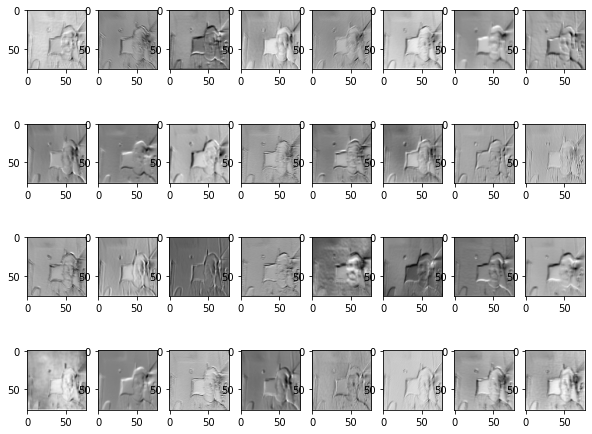

In [0]:
visualize_conv_layer('Conv2d_2b_3x3')
#print(model2.layers[4].output)A